In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(33)

In [2]:
%matplotlib inline

In [3]:
def plot_angles_cube_space(N, lp, n_iter=100, D=2):
    angles = []

    for _ in tqdm(range(n_iter)):
        DAG = dag.CubeSpaceGraph(lp=lp)
        R = dag.cube_space_interval(N, D)
        G = DAG.generate_graph(R, weighted=True)
        greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
        angles.extend(DAG.compute_path_property(greedy_forward, dag.paths.get_angles).values())

    angles = np.array(angles)
    
    # Create histogram
    plt.hist(angles, bins=50, edgecolor='black', density=True)
    plt.title(f'Angles (forward greedy shortest path, p = {lp})')
    plt.xlabel('Angle (radians)')
    plt.ylabel('Density')
    plt.show()

100%|██████████| 500/500 [02:34<00:00,  3.23it/s]


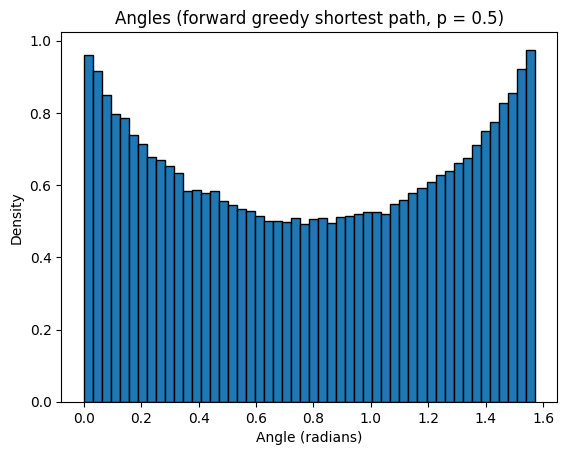

In [4]:
plot_angles_cube_space(N=500, lp=0.5, n_iter=500)

100%|██████████| 500/500 [02:27<00:00,  3.40it/s]


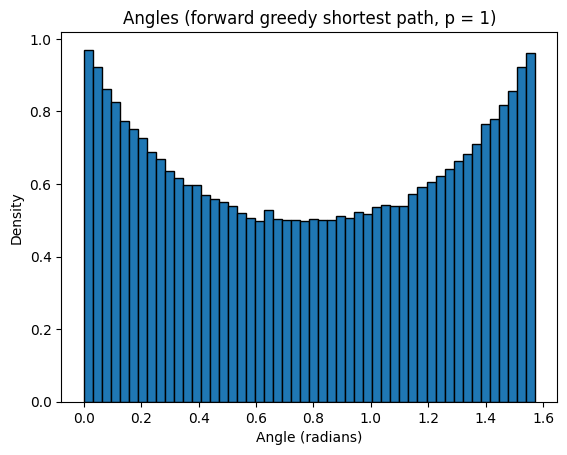

In [5]:
plot_angles_cube_space(N=500, lp=1, n_iter=500)

100%|██████████| 500/500 [02:38<00:00,  3.15it/s]


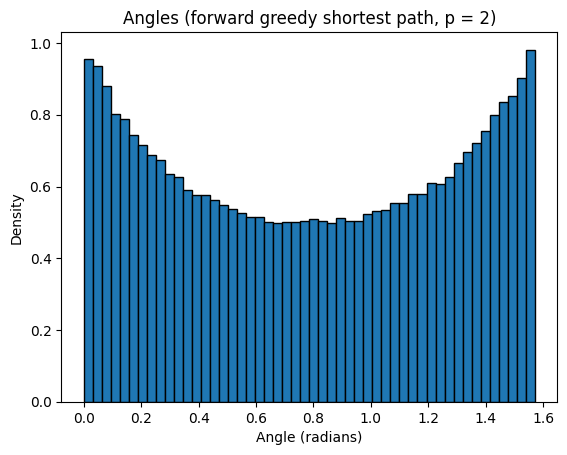

In [6]:
plot_angles_cube_space(N=500, lp=2, n_iter=500)